In [18]:
# Import general libraries
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

In [19]:
# import machine learning libaries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [3]:
# Import data through github link
# https://raw.githubusercontent.com/bendbir/bird_bones/main/bird.csv

url = 'https://raw.githubusercontent.com/bendbir/bird_bones/main/bird.csv'
birds_data = pd.read_csv(url, low_memory=False)
# Dataset is now stored in a Pandas Dataframe

Dataset obtained from Kaggle: https://www.kaggle.com/datasets/zhangjuefei/birds-bones-and-living-habits

In [4]:
print (birds_data.head())

   id   huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw type
0   0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84   SW
1   1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01   SW
2   2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34   SW
3   3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41   SW
4   4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13   SW


In [5]:
# Print description ('.describe()') of data
birds_data.describe()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,420.000000,419.000000,419.000000,417.000000,418.000000,418.000000,419.000000,418.000000,419.000000,419.000000,419.000000
mean,209.500000,64.650501,4.370573,69.115372,3.597249,36.872416,3.220883,64.662823,3.182339,39.229976,2.930024
std,121.387808,53.834549,2.854617,58.784775,2.186747,19.979082,2.023581,37.838145,2.080827,23.184313,2.185673
min,0.000000,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,104.750000,25.170000,2.190000,28.050000,1.870000,21.297500,1.715000,36.417500,1.565000,23.035000,1.425000
50%,209.500000,44.180000,3.500000,43.710000,2.945000,31.130000,2.520000,52.120000,2.490000,31.740000,2.230000
75%,314.250000,90.310000,5.810000,97.520000,4.770000,47.120000,4.135000,82.870000,4.255000,50.250000,3.500000
max,419.000000,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


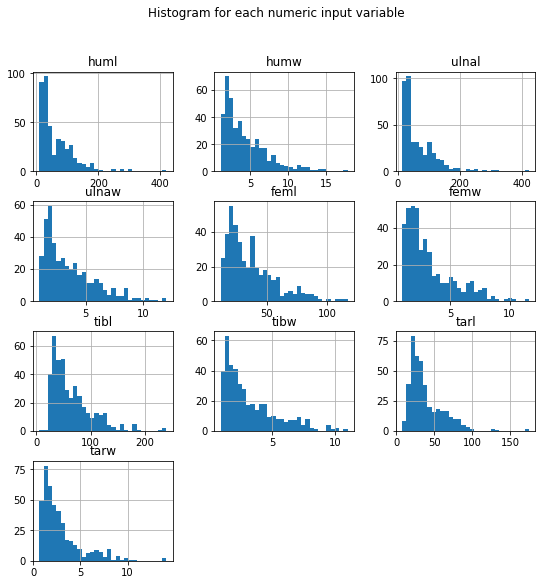

In [6]:
# Graph distributions to visually assess

graph_data = birds_data.drop(['id', 'type'] ,axis=1)
graph_data.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('bird_bones_hist')
plt.show()

In [7]:
data_types = birds_data.dtypes
print("data types:")
print(data_types)

data types:
id         int64
huml     float64
humw     float64
ulnal    float64
ulnaw    float64
feml     float64
femw     float64
tibl     float64
tibw     float64
tarl     float64
tarw     float64
type      object
dtype: object


In [8]:
# first, drop type and id.  Type needs to be dropped since object won't let us use np.isnan()
birds_data_test = birds_data.drop(['id', 'type'], axis = 1)

# Test for NaN
np.where(np.isnan(birds_data_test))

(array([160, 160, 204, 204, 207, 207, 342, 342, 342, 342, 378, 378, 378,
        396, 404]), array([4, 5, 2, 3, 8, 9, 0, 1, 2, 3, 2, 6, 7, 6, 4]))

In [9]:
# If interested, look at row to confirm NaN values
# print(DATAFRAME.iloc[ROW])

# Drop NaNs from original dataframe
birds_data2 = birds_data.dropna()

# Test again for NaN, confirm there aren't any
birds_data_test = birds_data2.drop(['id', 'type'], axis = 1)
np.where(np.isnan(birds_data_test))

(array([], dtype=int64), array([], dtype=int64))

In [10]:
# Define feature and target dataframes
# Can we predict bird based on all metrics?

# birdTypeInput is what we input to predict bird type.  Drop id and type since we don't need those.
birdTypeInput = birds_data2.drop(['type'], axis = 1)

# Define target label, in this case 'id'
birdTargetLabel = birds_data2[['type']].copy()

In [11]:
# Use train_test_split, create input_train, input_test, label_train, label_test
input_train, input_test, label_train, label_test = train_test_split(birdTypeInput, birdTargetLabel, stratify = birdTargetLabel)

In [12]:
# Test that the keys match for training dataframes
print (input_train.head())
print (label_train.head())

      id    huml  humw   ulnal  ulnaw   feml  femw    tibl  tibw   tarl  tarw
12    12  172.00  8.44  142.00   8.43  52.18  6.68  180.00  9.62  82.58  5.50
134  134   46.40  3.39   38.60   3.32  29.00  2.36   49.08  2.49  26.55  2.19
269  269   27.07  2.66   31.95   1.87  18.80  1.51   26.38  1.33  12.52  1.16
11    11  186.00  9.83  152.00   8.76  56.02  7.02  185.00  8.07  90.80  4.59
275  275   39.98  3.34   47.50   2.64  28.57  2.53   42.96  2.20  27.66  1.67
    type
12    SW
134    W
269    P
11    SW
275    P


In [13]:
# Test that shapes are correct
# Trains and tests should match number of rows
print(input_train.shape)
print(input_test.shape)
print(label_train.shape)
print(label_test.shape)

(309, 11)
(104, 11)
(309, 1)
(104, 1)


In [14]:
# make your model! 
gnb = GaussianNB()
gnb.fit(input_train, label_train)
bird_bone_pred = gnb.predict(input_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
# How well did our model do?
# find the accuracy score.
print("Gaussian Naive Bayes accuracy:", round((accuracy_score(label_test, bird_bone_pred)*100),2))

Gaussian Naive Bayes accuracy: 75.96


In [16]:
# Let's take a look at the confusion matrix.
# Import confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [17]:
# Generate the confusion matrix and classification report
print ("THIS IS THE CONFUSION MATRIX:")
print(confusion_matrix(label_test, bird_bone_pred))
print ("THIS IS THE CLASSIFICATION REPORT:")
print(classification_report(label_test, bird_bone_pred))

THIS IS THE CONFUSION MATRIX:
[[ 5  1  4  0  0  0]
 [ 3  9  0  0  0  0]
 [ 5  0 26  0  0  0]
 [ 0  0  0 23  0  6]
 [ 0  2  0  1  3  0]
 [ 0  0  2  0  1 13]]
THIS IS THE CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           P       0.38      0.50      0.43        10
           R       0.75      0.75      0.75        12
          SO       0.81      0.84      0.83        31
          SW       0.96      0.79      0.87        29
           T       0.75      0.50      0.60         6
           W       0.68      0.81      0.74        16

    accuracy                           0.76       104
   macro avg       0.72      0.70      0.70       104
weighted avg       0.78      0.76      0.77       104

